## Red Wine Quality- EDA + RF Classification
## Explanation of the variables

**Fixed Acidity**: most acids involved with wine or fixed or nonvolatile (do not evaporate readily).

**Volatile Acidity**: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.

**Citric Acid:** found in small quantities, citric acid can add 'freshness' and flavor to wines.

**Residual Sugar:** the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter.

**Chlorides:** the amount of salt in the wine.

**Free Sulfur Dioxide:** the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion.

**Total Sulfur Dioxide:** amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2.

**Density:** the density of water is close to that of water depending on the percent alcohol and sugar content.

**pH:** describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4.

**Sulphates:** a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial.

**Alcohol:** this is the percent alcohol content of the wine.

**Quality:** output variable (based on sensory data, score between 3 and 8).

## 1. Importing Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

## 2. Importing Dataset

In [2]:
df = pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")

## 3. Data Pre-Processing

In [3]:
# Data Information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
# Checking for missing values
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
# Removing the duplicate data
df.drop_duplicates(keep='first')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<AxesSubplot:>

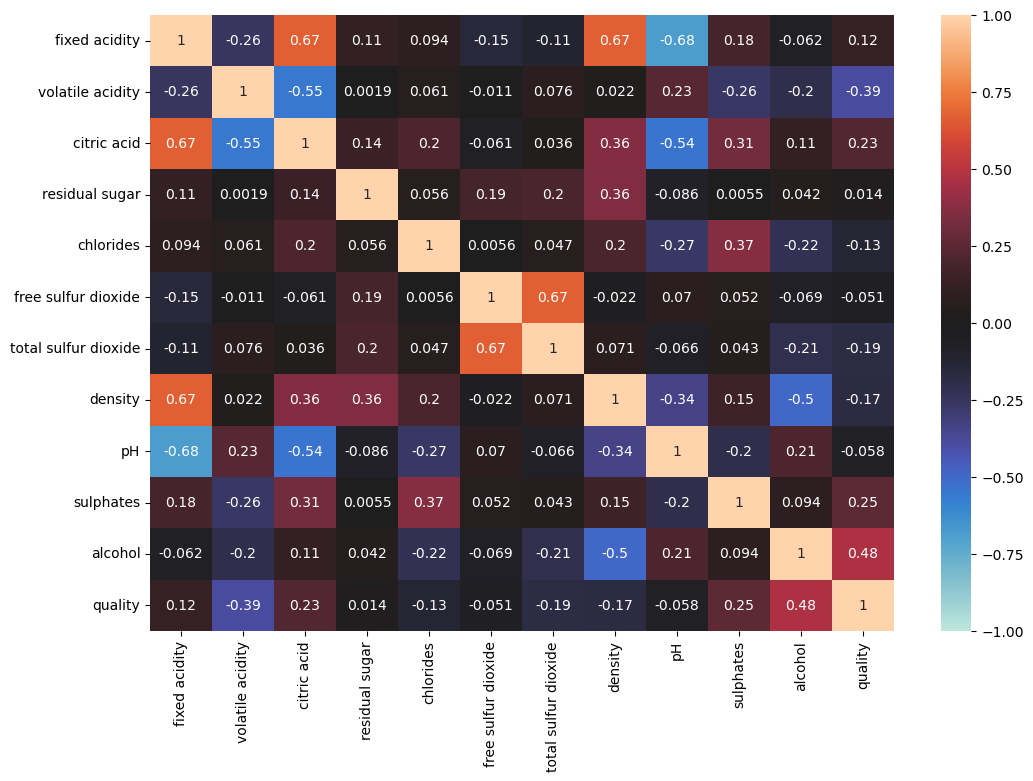

In [6]:
# Correlation matrix
plt.figure(figsize=(12,8), dpi=100)
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='icefire',annot=True)

In [7]:
# Selecting highly correlated features
relevant_features= abs(df.corr()['quality'])[abs(df.corr()['quality'])>0.1]

In [8]:
relevant_features.nlargest(10)

quality                 1.000000
alcohol                 0.476166
volatile acidity        0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide    0.185100
density                 0.174919
chlorides               0.128907
fixed acidity           0.124052
Name: quality, dtype: float64

[Text(0, 0, '10.0'),
 Text(0, 0, '53.0'),
 Text(0, 0, '681.0'),
 Text(0, 0, '638.0'),
 Text(0, 0, '199.0'),
 Text(0, 0, '18.0')]

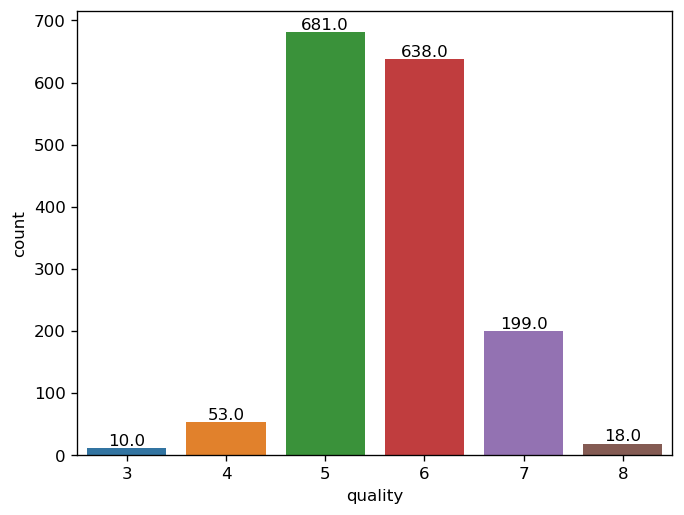

In [9]:
# Checking Wine Quality Distribution
plt.figure(dpi=120)
ax = sns.countplot(data=df, x='quality')
ax.bar_label(ax.containers[0], fmt='%.1f')

**As per given in the dataset,**

**Quality >= 6.5 is "Good"**

**Quality < 6.5 is "Bad"**

**So converting the quality into "Good" and "Bad"**

**3, 4, 5 -> 0 (Bad Quality)**

**6, 7, 8 -> 1 (Good Quality)**

In [10]:
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 6.5 else 0)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


## 4. Data Imbalance

Text(0.5, 0, 'Before Balancing')

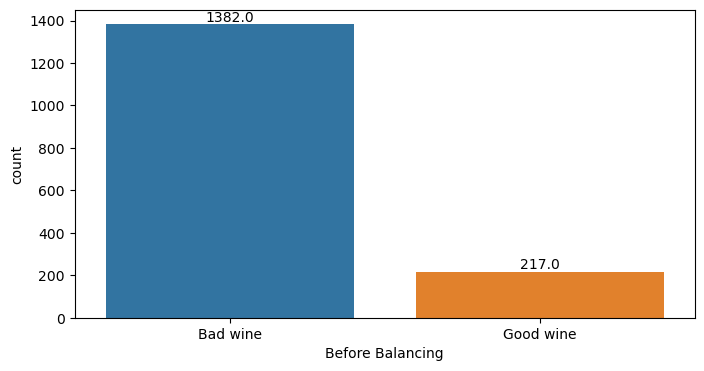

In [11]:
# Checking for data imbalance
plt.figure(figsize=(8, 4),dpi=100)

ax= sns.countplot(data=df, x='quality')
ax.bar_label(ax.containers[0], fmt='%.1f')
plt.xticks([0,1], ['Bad wine', 'Good wine'])
plt.xlabel("Before Balancing")

**As we can see, the data is imbalanced with a much lower number of "good quality" data points compared to "bad quality." If we simply oversample the minority class, we may achieve high accuracy, but this approach could potentially lead to overfitting, as the model may simply memorize the data during training.**

**On the other hand, undersampling the majority class would result in a significant reduction in the overall number of data points, which could negatively impact the model's performance. To address this issue, a better approach would be to undersample the majority class by 85% and then oversample the minority class. This strategy can lead to improved accuracy while also reducing the risk of overfitting the data.**






In [12]:
# X -> Dependent Features, Y -> Independent Feature
X=df[['alcohol','sulphates','volatile acidity','density','total sulfur dioxide','citric acid']].values
y=df['quality'].values

In [13]:
# Undersampling the majority class by 65%
X_over,y_over=RandomUnderSampler(sampling_strategy=0.85).fit_resample(X,y) #

In [14]:
# Oversampling the minority class
X_over,y_over=RandomOverSampler(sampling_strategy='minority').fit_resample(X_over,y_over)

Text(0.5, 0, 'After Balancing')

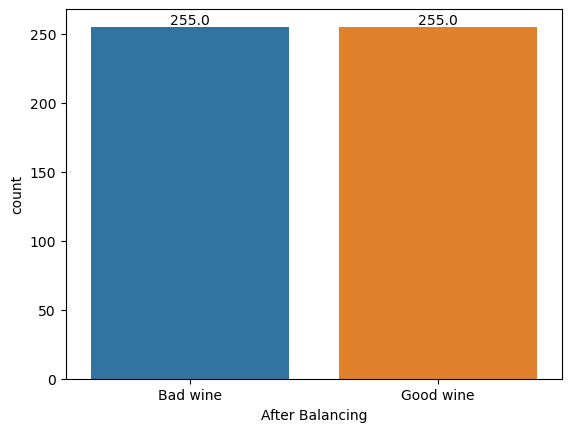

In [15]:
# Data after balancing
ax=sns.countplot(data=df, x=y_over)
ax.bar_label(ax.containers[0], fmt='%.1f')
plt.xticks([0,1], ['Bad wine', 'Good wine'])
plt.xlabel("After Balancing")

## 5. Exploratory Data Analysis

In [16]:
# Correlation Graphs
def corr_graph(x,y):
    sns.regplot(x=df[f'{x}'], y=df[f'{y}'], color = '#0e87cc',lowess=True,scatter_kws={'edgecolor':'black','alpha':.6},line_kws={"color": "red","linewidth":2})

Text(0.5, 1.0, 'Negative Correlation B/W Fixed Acidity & pH')

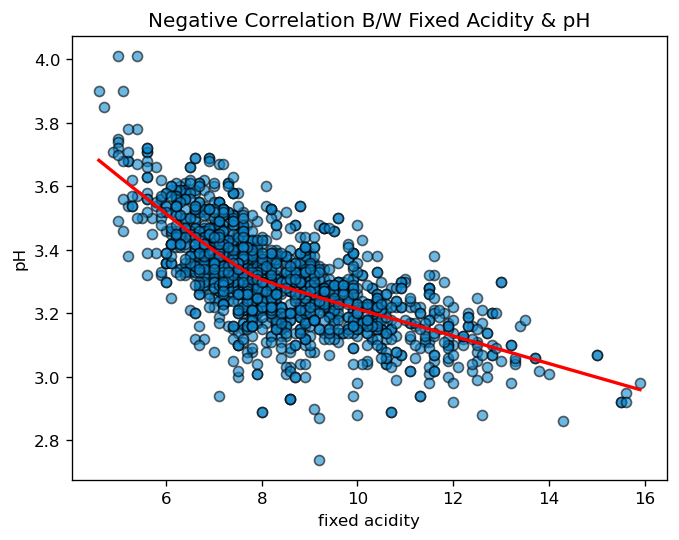

In [17]:
# Negative Correlation B/W Fixed Acidity & pH
plt.figure(dpi=120)
corr_graph('fixed acidity','pH')
plt.title("Negative Correlation B/W Fixed Acidity & pH")

Text(0.5, 1.0, 'Positive Correlation B/W Fixed Acidity & Density')

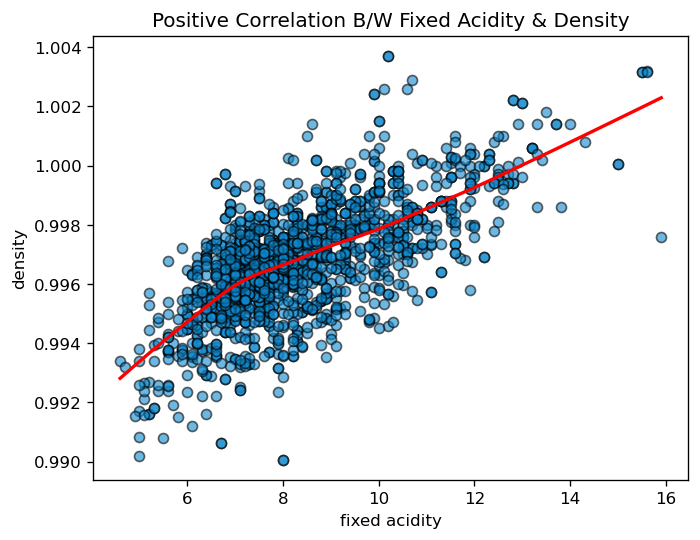

In [18]:
# Positive Correlation B/W Fixed Acidity & Density
plt.figure(dpi=120)
corr_graph('fixed acidity','density')
plt.title("Positive Correlation B/W Fixed Acidity & Density")

Text(0.5, 1.0, 'Positive Correlation B/W Fixed Acidity & Citric Acid')

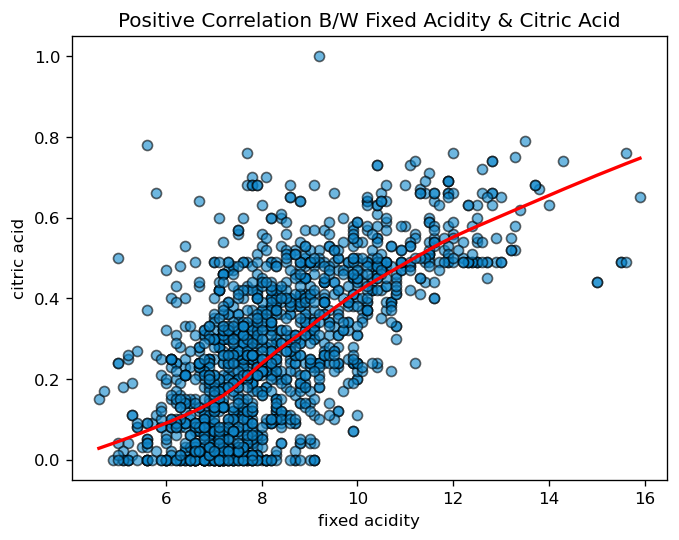

In [19]:
# Positive Correlation B/W Fixed Acidity & Citric Acid
plt.figure(dpi=120)
corr_graph('fixed acidity','citric acid')
plt.title("Positive Correlation B/W Fixed Acidity & Citric Acid")

### Data Distribution Skew

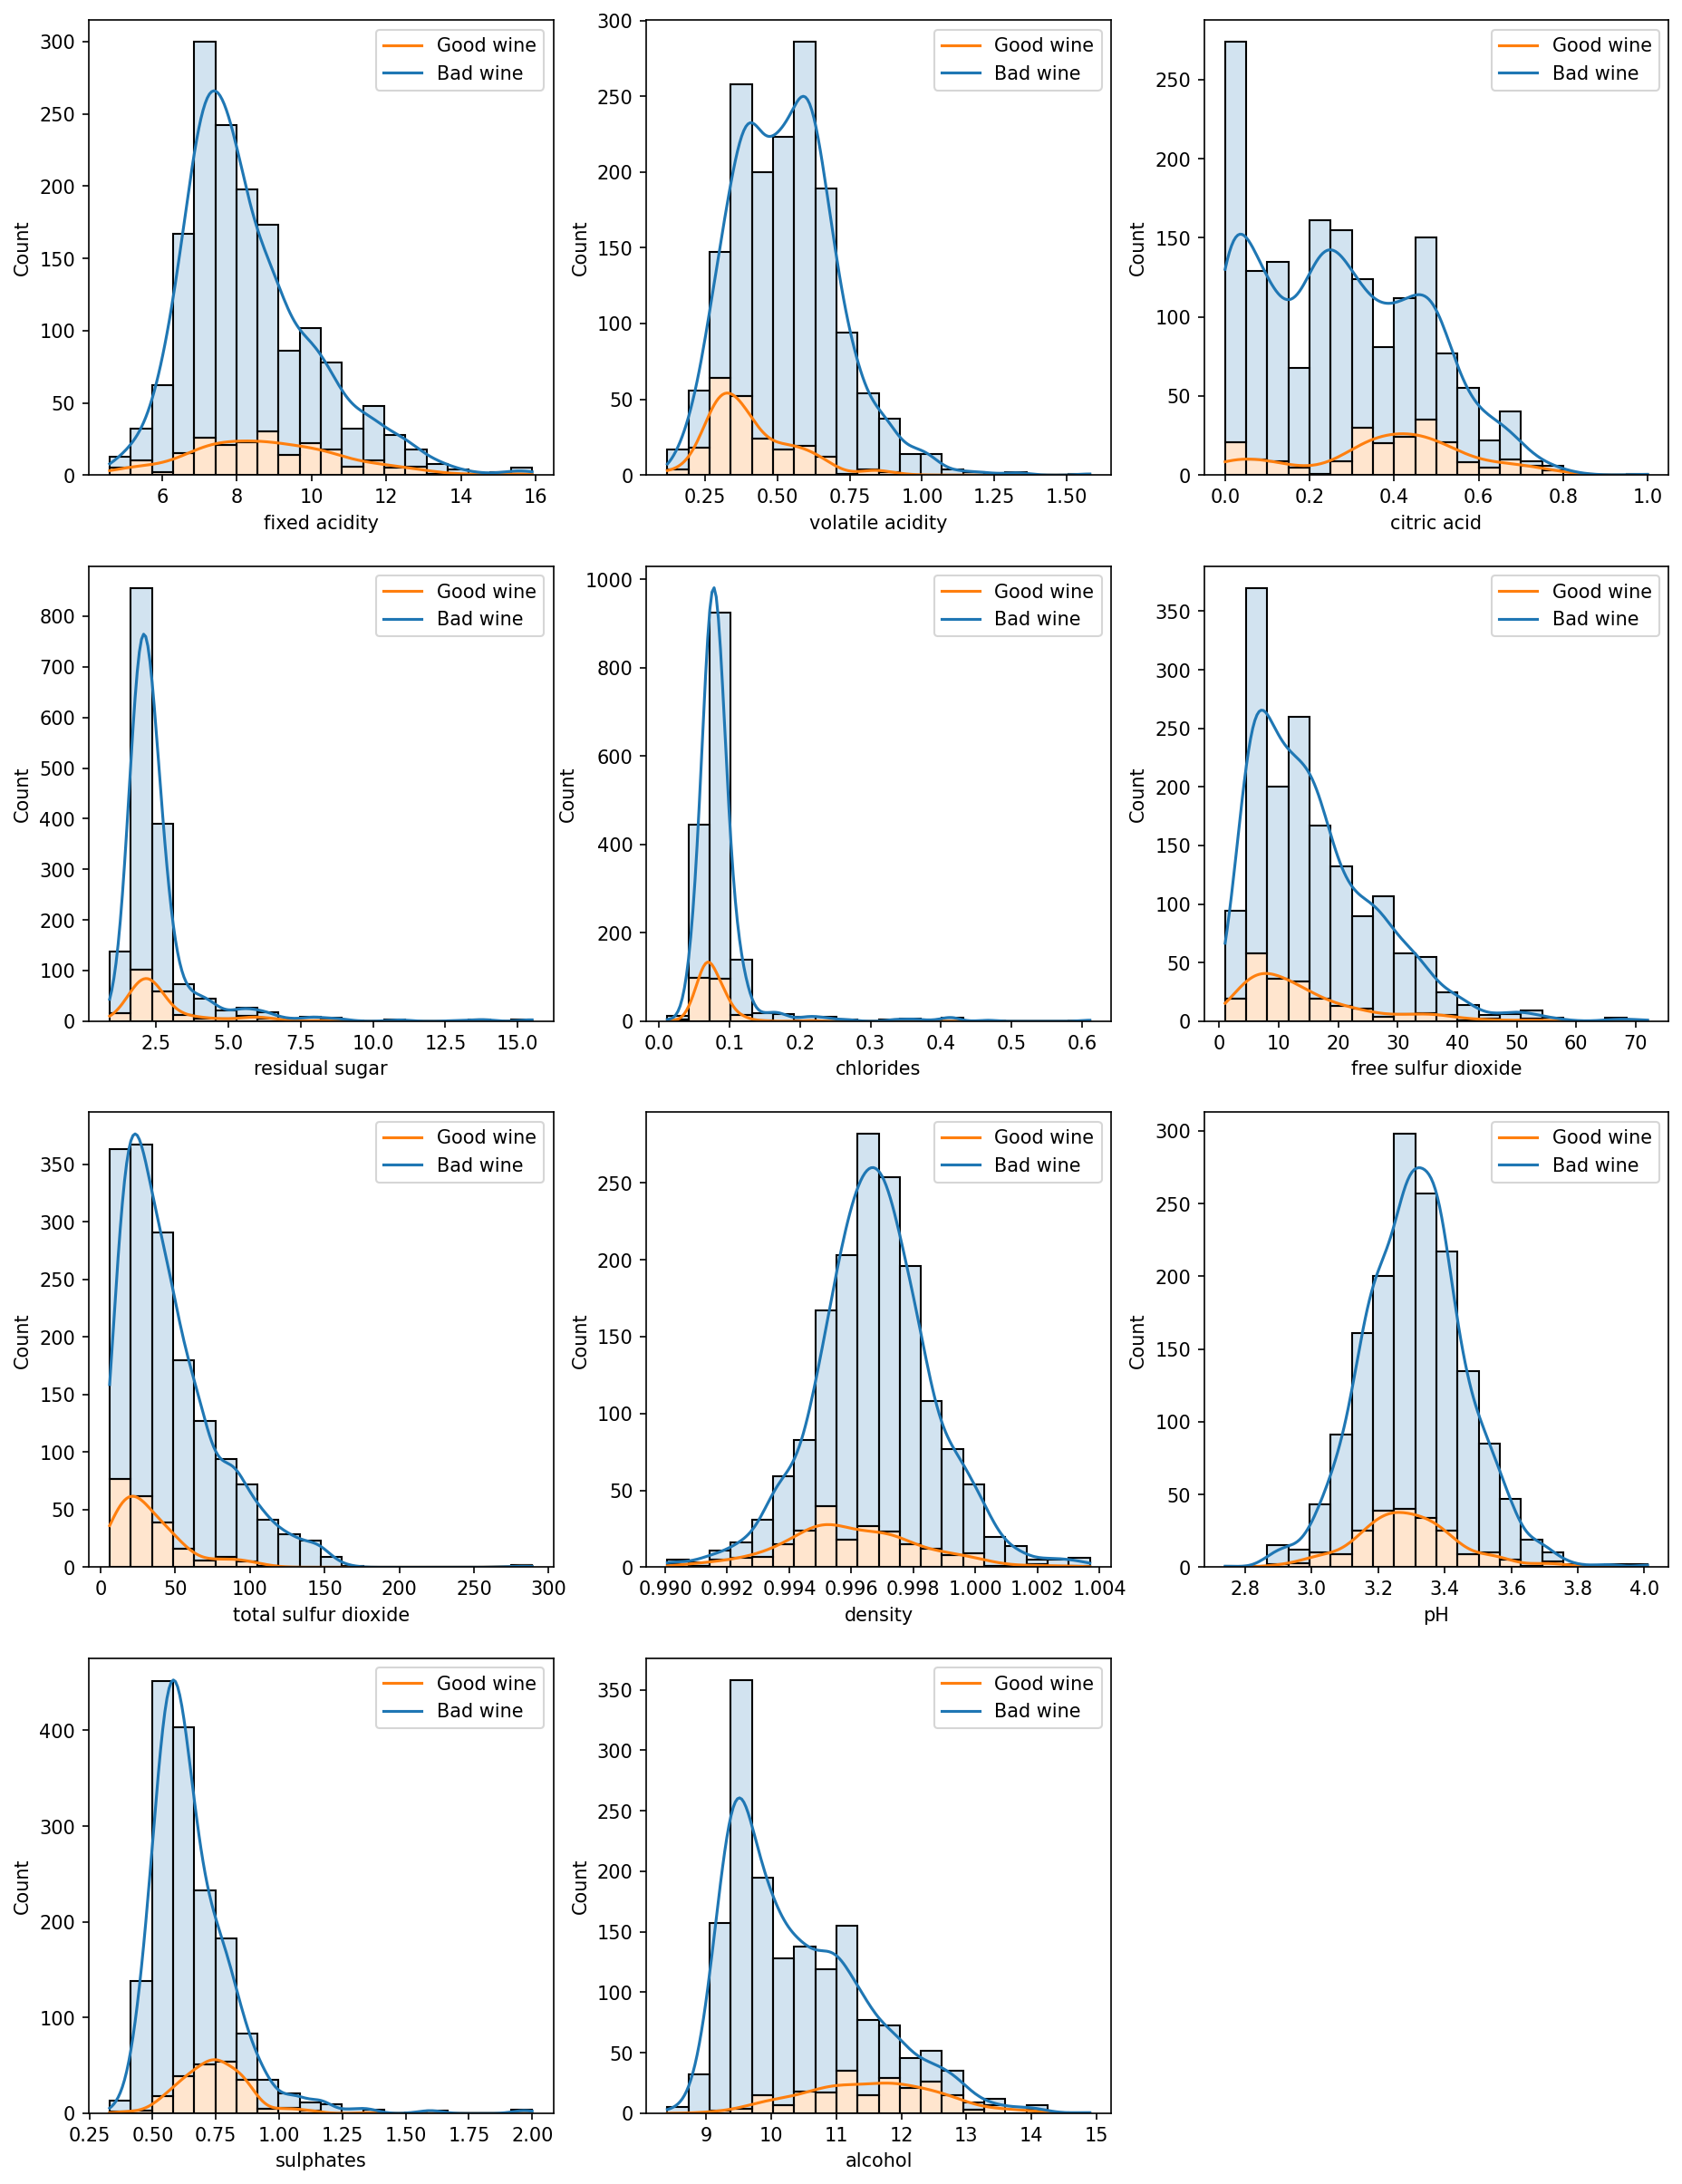

In [20]:
plt.figure(figsize=(15, 20),dpi=150)
for i,j in enumerate(df.drop('quality',axis=1).columns):
    plt.subplot(4, 3, i+1)
    sns.histplot(data=df, x=df[f"{j}"], hue="quality", kde=True, bins=20, multiple="stack", alpha=.2)
    plt.legend(['Good wine','Bad wine'])

## 6. Splitting Data into Training and Testing Set

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_over,y_over, test_size=0.20, random_state=42)

## 7. Training Random Forest Model using the Training Set

In [22]:
classifier = RandomForestClassifier(n_estimators= 100,criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

## 8. Random Forest Classification Report

              precision    recall  f1-score   support

           0       0.93      0.77      0.85        53
           1       0.79      0.94      0.86        49

    accuracy                           0.85       102
   macro avg       0.86      0.86      0.85       102
weighted avg       0.87      0.85      0.85       102

Accuracy Score: 85.29%


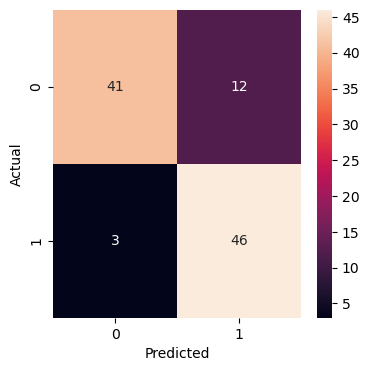

In [23]:
y_pred=classifier.predict(X_test)
confusion_svc=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(confusion_svc,fmt="d",annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)*100:.2f}%")

## 9. K-Fold Cross Validation (10 Fold)
**In each set (fold) training and the test would be performed precisely once during this entire process. It helps us to avoid overfitting. As we know when a model is trained using all of the data in a single short and give the best performance accuracy. To resist this k-fold cross-validation helps us to build the model is a generalized one.**

In [24]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 84.08 %
Standard Deviation: 6.18 %


## 10. Predicting a Single data

In [25]:
pred=classifier.predict([[10.5,0.75,0.560,0.9969,56.0,0.28]])
if pred==0:
    print("Predicted to be Bad Quality Wine")
else:
    print("Predicted to be Good Quality Wine")

Predicted to be Bad Quality Wine


### So, We have come to an end, Follow and Upvote If like this EDA + Prediction
### Thank You and Happy Kaggling !